In [1]:
import pandas as pd
import numpy as np
import allocate
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

price_pct_df = pd.read_csv('Acutal Testing Data.csv', index_col=0)
analyst_1_prediction_df = pd.read_csv('Predicted Testing Data Analyst 1.csv', index_col=0)
analyst_2_prediction_df = pd.read_csv('Predicted Testing Data Analyst 2.csv', index_col=0)
analyst_3_prediction_df = pd.read_csv('Predicted Testing Data Analyst 3.csv', index_col=0)
actual_stock_df = pd.read_csv('Acutal Testing Data.csv', index_col=0)
actual_stock_df.head()

,A,B,C,D,E,F,G,H,I
0,141.964897,226.352949,146.484337,77.539808,134.944262,32.982797,167.440304,297.091832,3091.003490
1,144.935575,227.882208,145.000811,78.897964,139.777286,33.608131,172.101489,305.086648,3101.989323
2,144.437134,234.666980,149.455145,81.378646,137.287929,33.521216,173.138616,304.388169,3134.173443
3,139.034096,231.480569,146.563009,83.680871,140.464937,32.373154,166.264334,300.779456,3122.525940
4,141.213983,233.275829,147.956318,79.816857,134.809211,31.813596,167.837537,312.957644,3134.811377


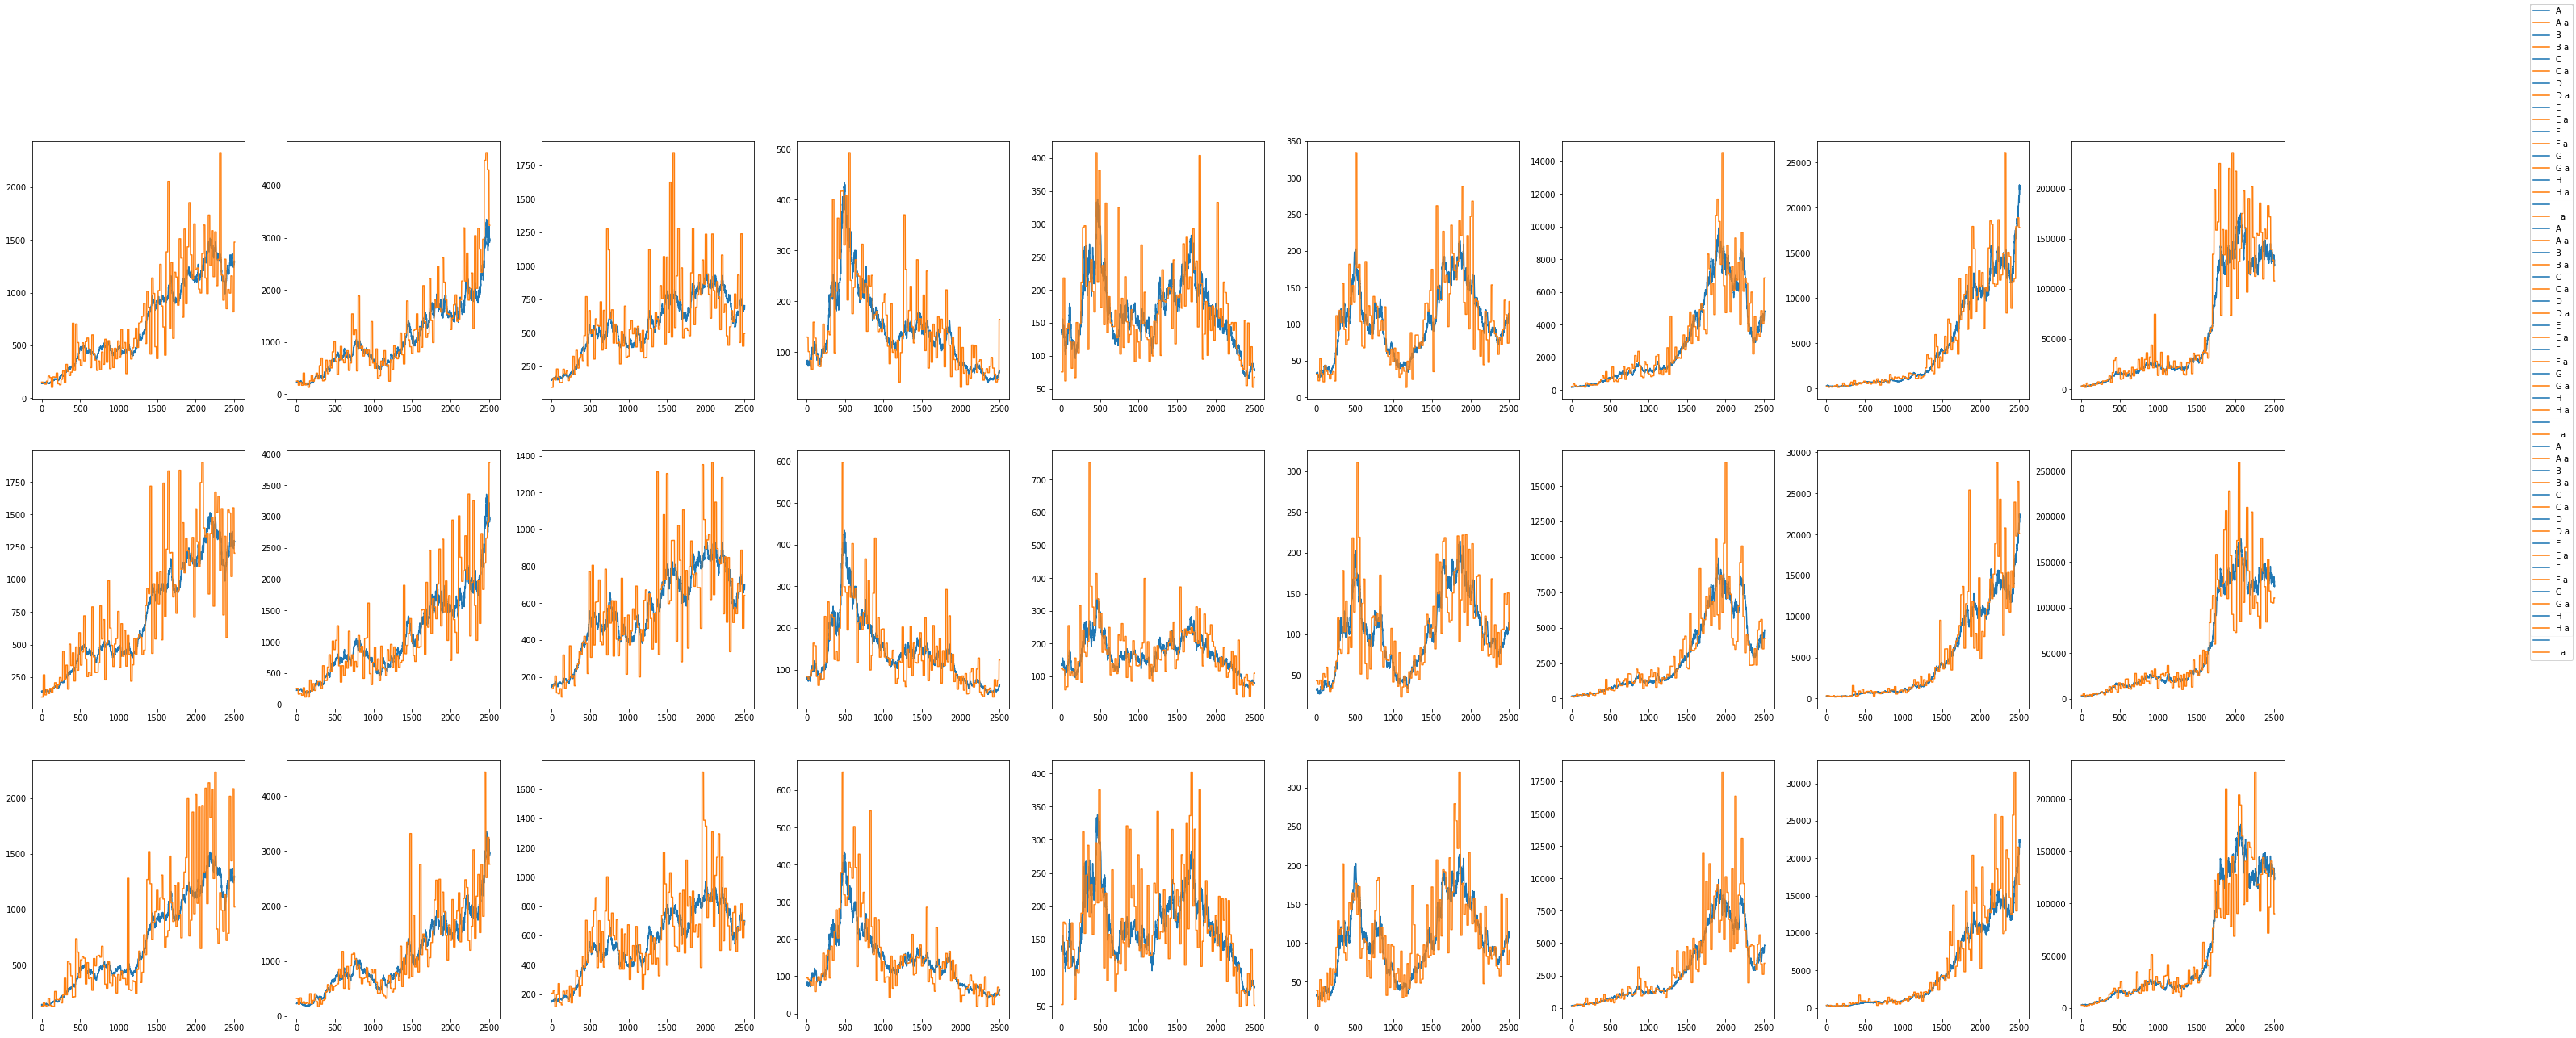

In [2]:

stocks = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
fig, axes = plt.subplots(3,9, figsize=(50,20))

for i,a in enumerate([analyst_1_prediction_df,analyst_2_prediction_df,analyst_3_prediction_df]):
    for j,stock in enumerate(stocks):
        actual_stock_df.iloc[:,stocks.index(stock)].plot(ax=axes[i,j], label="{}".format(stock))
        a.iloc[:,stocks.index(stock)].plot(ax=axes[i,j], label="{} a".format(stock))
        #plt.plot(actual_stock_df.iloc[:,stocks.index(stock)], ax=axes[i,j], label=stock, sharex=True)
        #plt.plot(a.iloc[:,stocks.index(stock)],ax=axes[i,j], label="{} a{}".format(stock,i+1), sharex=True)

        fig.legend()

plt.savefig("analyst_vs_price.png")
#actual_stock_df.plot(y=stocks, subplots=True, layout=(3,3), figsize=(15,15))
#analyst_1_prediction_df.plot(y=stocks, subplots=True, layout=(3,3), figsize=(15,15))
#plt.show()

In [3]:
weights_hist_df = pd.read_csv('weights_history.csv', index_col=0)
percent_change_df = pd.read_csv('percent_change.csv', index_col=0)


# data = []
# for i in  range(np.shape(weights_hist)[1]+1):
#     temp  = []
#     for j in range(np.shape(percent_change)[1]+1):
#         temp.append(np.correlate(weights_hist[i],percent_change[j]))
#     data.append(temp)

# np.array(data).shape




In [4]:
weights_hist_df = weights_hist_df.reset_index()

In [5]:
weights_hist = weights_hist_df.to_numpy()
percent_change = percent_change_df.to_numpy()[16:]
weights_hist.shape

(2492, 9)

In [6]:
percent_change.shape

(2492, 9)

In [7]:
data = []
for i in  range(np.shape(weights_hist)[1]):
    data.append(np.correlate(weights_hist[i],percent_change[i]))

np.array(data).shape

(9, 1)

<BarContainer object of 9 artists>

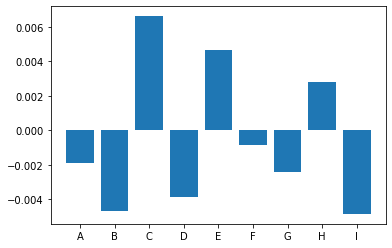

In [8]:
plt.bar(x=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'], height=np.reshape(data,9))

In [9]:
# [1,2,4,6]